In [9]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [10]:
kpi = '88cf3a776ba00e7c'
fact = 0.1

In [11]:
df = pd.read_csv('./../../DATASETS/fbprophet/fb_train_' + kpi + '.csv',index_col='ds')
df_sup = pd.read_csv('./../../DATASETS/fbprophet/fb_test_' + kpi + '.csv',index_col='ds')
df_andrei = pd.read_csv('./../../DATASETS/andrei/andrei_' + kpi + '.csv',index_col='timestamp')

df_train = pd.read_csv('./../../train/KPI/train_' + kpi + '.csv',index_col='timestamp')
df_train.label = df_train.label * fact
# df_andrei.predict = df_andrei.predict * fact

In [12]:
df_train.groupby(df_train.label).count()

,value,label,KPI ID
label,,,
0.0,62330,62330,62330
0.1,3106,3106,3106


In [13]:
# df_train.groupby(df_train.label).count()
df_andrei.groupby(df_andrei.predict).count()

,KPI ID
predict,
0,62329
1,3107


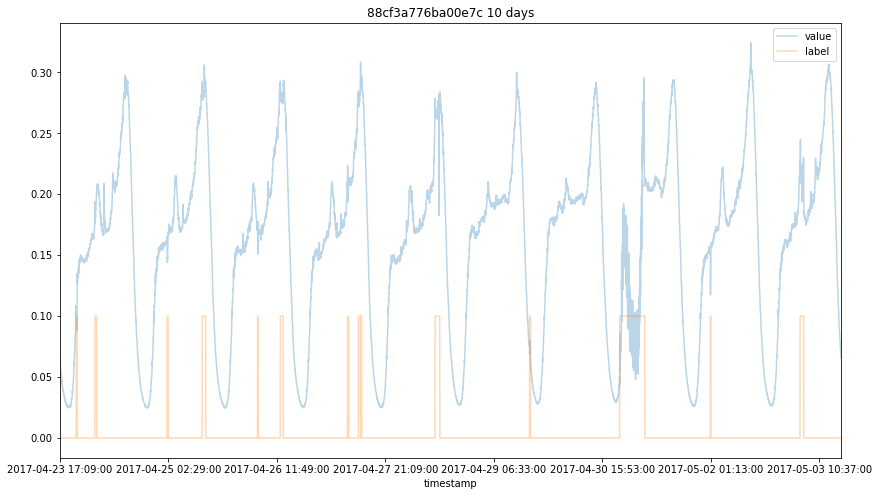

In [14]:
d = 10

# df.tail(d*1440).plot(kind='line',figsize=(14,8),alpha=0.3)
# # plt.plot(df['yhat'].tail(d*1440),alpha=.5)
# plt.plot(df_sup['yhat'].head(d*1440),alpha=.8)
# plt.ylim(8 * 10**9,2000)

df_train.head(d*1440).plot(kind='line',figsize=(14,8),alpha=0.3)
plt.title('88cf3a776ba00e7c 10 days')
plt.savefig('88cf3a776ba00e7c_10day.png',bbox_inches='tight')
# plt.plot(df_train['label'].tail(d*1440))


# df_sup['value'].tail(d*1440).plot(kind='line',figsize=(14,8),alpha=0.3)
# plt.plot(df_andrei['predict'].values[:(-1440)*d])
# plt.ylim(500,2000)


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


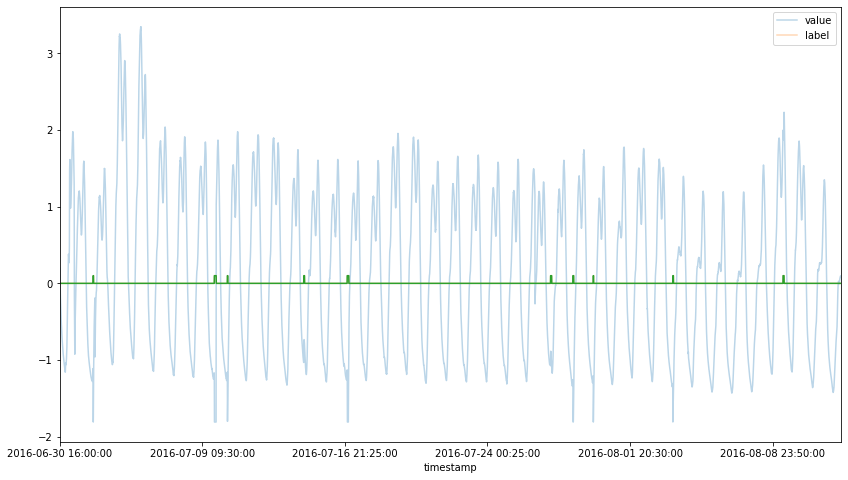

In [43]:
df_train.plot(kind='line',figsize=(14,8),alpha=0.3)
plt.plot(df_train['label'])

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


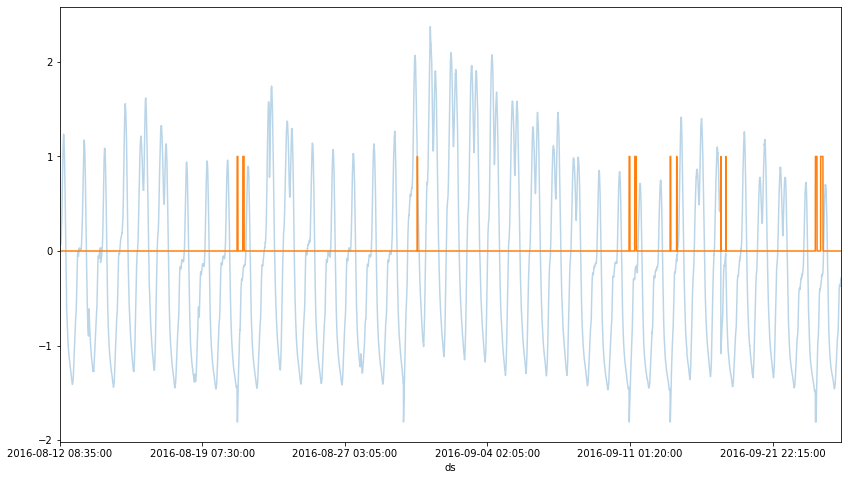

In [44]:
df['value'].head(20*1440).plot(kind='line',figsize=(14,8),alpha=0.3)
plt.plot(df_andrei['predict'].head(20*1440))
# plt.ylim(500,2000)

In [24]:
# fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,15))
# axes[0].plot(df_sup['value'])
# axes[1].plot(df_sup['value'])

Text(0.5, 1.0, '02e99bd4f6cfb33f Test')

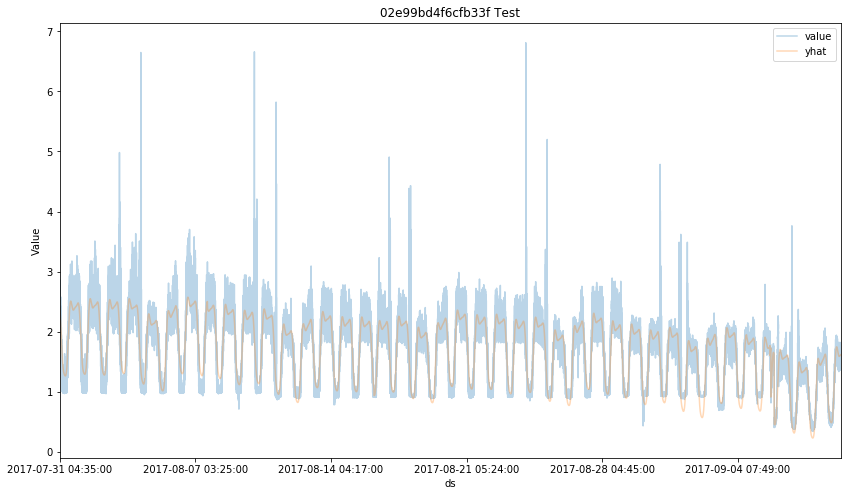

In [36]:
df_sup.head(40*1440).plot(kind='line',figsize=(14,8),alpha=0.3)
# plt.plot(df_andrei['predict'])
plt.ylabel('Value')
plt.title(kpi + ' Test')
# plt.savefig(kpi + '_test.png', bbox_inches="tight")

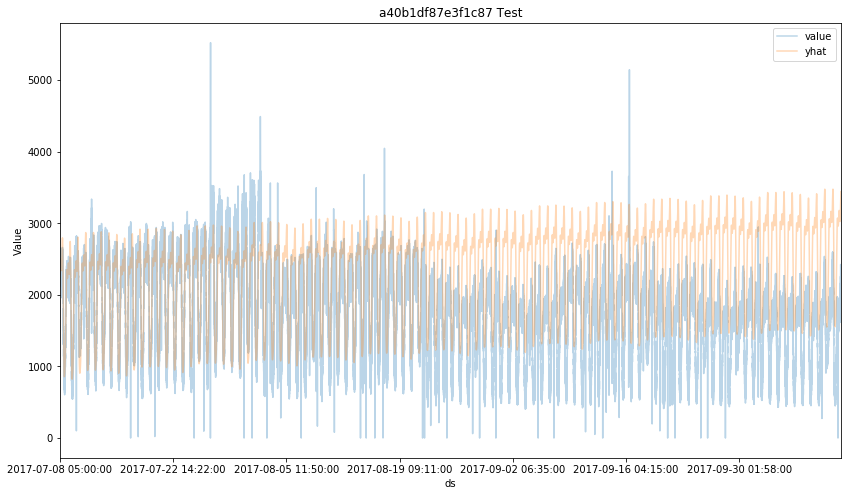

In [27]:
df.plot(kind='line',figsize=(14,8),alpha=0.3)
plt.ylabel('Value')
plt.title(kpi + ' Test')
plt.savefig(kpi + '.png', bbox_inches="tight")

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


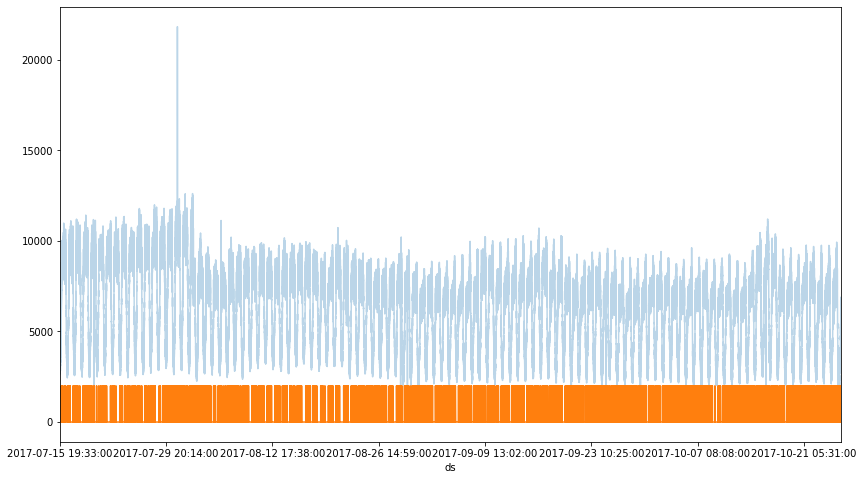

In [288]:
# df['value'].plot(kind='line',figsize=(14,8),alpha=0.3)
# # plt.plot(df['yhat'],alpha=.5)
# # plt.ylim(1000,2500)
# plt.plot(df_sup['yhat'],alpha=.8)
# plt.ylim(-4,4)


# df_train.plot(kind='line',figsize=(14,8),alpha=0.3)

df_sup['value'].plot(kind='line',figsize=(14,8),alpha=0.3)
plt.plot(df_andrei['predict'])
# plt.ylim(500,2000)

In [300]:
test = np.where( (abs(df_sup['value'].values-df_sup['yhat'].values) > 2090), 1, 0 )
df_sup['pred'] = test * fact
df_sup.groupby(df_sup.pred).count()

,value,yhat
pred,,
0,146523,146523
2000,487,487


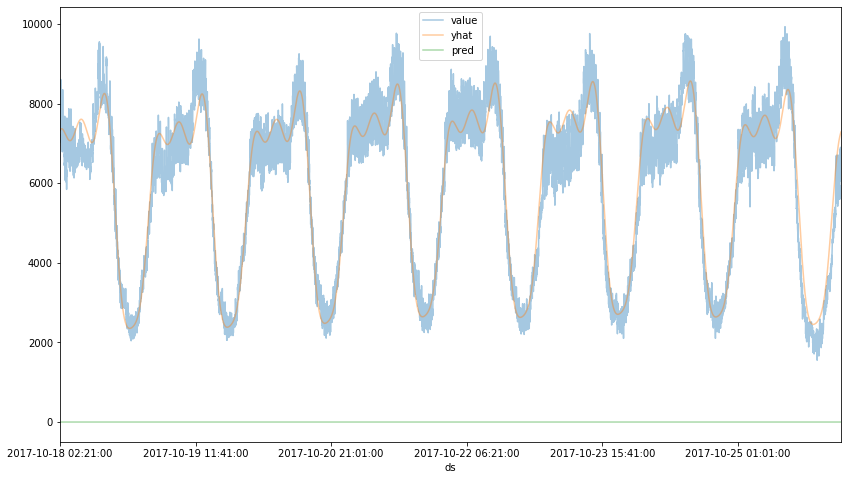

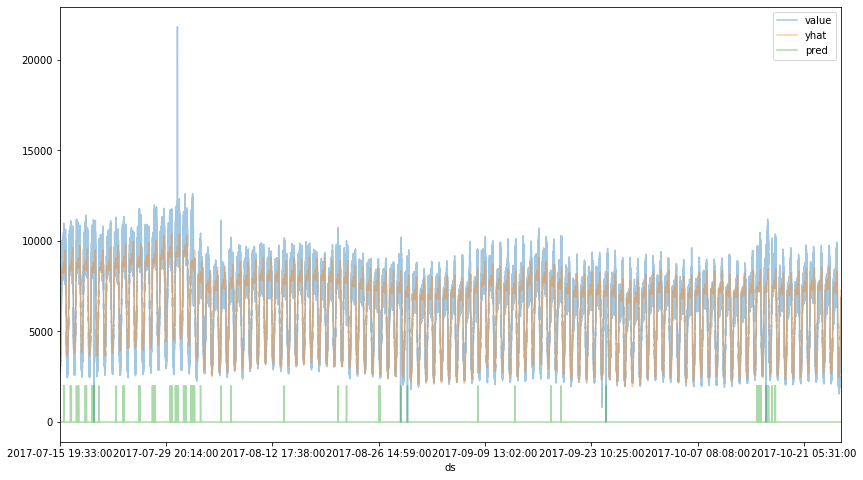

In [294]:
df_sup.tail(1440*8).plot(kind='line',figsize=(14,8),alpha=0.4)
df_sup.plot(kind='line',figsize=(14,8),alpha=0.4)

# plt.plot(df['yhat'].tail(10*1440),alpha=.5)
# plt.plot(df_sup['yhat'].tail(2*1440),alpha=.8)
# plt.plot(test[(2*1440):]*0.05)

In [291]:
df_train['ds'] = df_train['timestamp']
df_train['y'] = df_train['value']

KeyError: 'timestamp'

In [ ]:
df_test['ds'] = df_test['timestamp']
df_test = df_test.drop(['timestamp'], axis=1)
df_test['y'] = df_test['value']
df_test = df_test.drop(['value'], axis=1)


In [ ]:
df_train = df_train.drop(['timestamp','value'],axis=1)

In [7]:
df_test

,ds,y
0,2017-07-15 07:48:00,2580.0
1,2017-07-15 07:50:00,2645.0
2,2017-07-15 07:51:00,2527.0
3,2017-07-15 07:52:00,2477.0
4,2017-07-15 07:53:00,2486.0
...,...,...
147685,2017-10-26 02:16:00,1694.0
147686,2017-10-26 02:17:00,1857.0
147687,2017-10-26 02:18:00,1800.0
147688,2017-10-26 02:19:00,1739.0


In [8]:
model = Prophet()
model.fit(df_test)
pickle.dump(model, open('./../../PICKLE/fb_test_'+ KPI + '.pkl',"wb"))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
forecast = model.predict(df_test)

In [39]:
forecast.yhat_upper.max()

38430.29532127832

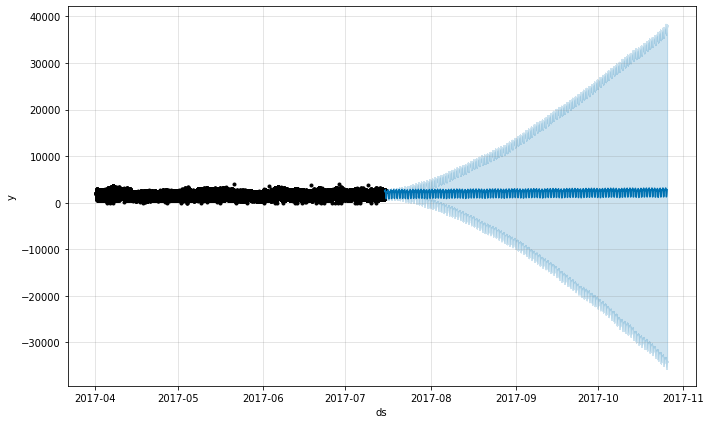

In [43]:
fig1 = model.plot(forecast)

## Plot

In [44]:
forecast = forecast.set_index(['ds'])

In [57]:
dataset = pd.DataFrame(forecast['yhat'], index=forecast.index)

In [66]:
df_test['yhat'] = dataset['yhat'] 

In [67]:
df_test

,value,yhat
timestamp,,
2017-07-15 07:48:00,2580.0,2515.887450
2017-07-15 07:50:00,2645.0,2515.529547
2017-07-15 07:51:00,2527.0,2515.298190
2017-07-15 07:52:00,2477.0,2515.032032
2017-07-15 07:53:00,2486.0,2514.731188
...,...,...
2017-10-26 02:16:00,1694.0,2778.253912
2017-10-26 02:17:00,1857.0,2779.457033
2017-10-26 02:18:00,1800.0,2780.604236


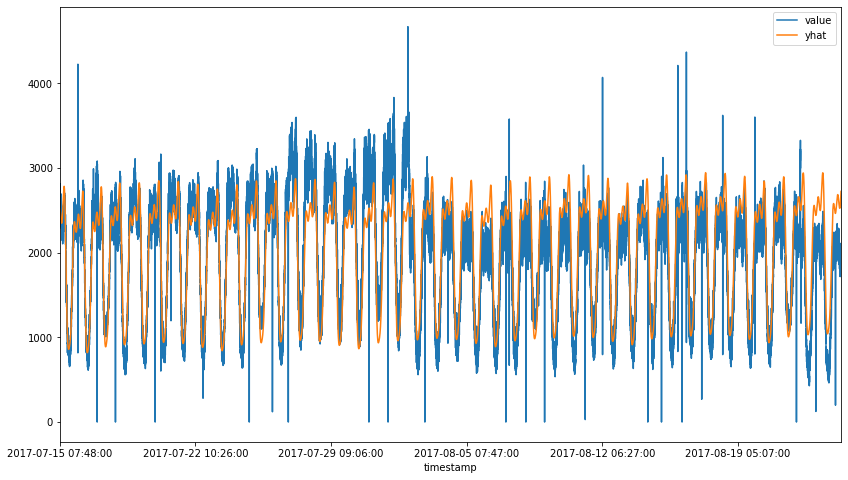

In [78]:
df_test.head(40*1440).plot(kind='line',figsize=(14,8))
# plt.plot(dataset['yhat'],alpha=.5)

In [79]:
sup = df_test.head(40*1440)

In [88]:
pred = np.where( abs(sup.yhat - sup.value) > 900, 1, 0)
sup['pred'] = pred

/home/millana/anaconda3/envs/machineLearning/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [90]:
sup.groupby(sup.pred).count()

,value,yhat
pred,,
0,57431,57431
1,169,169


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


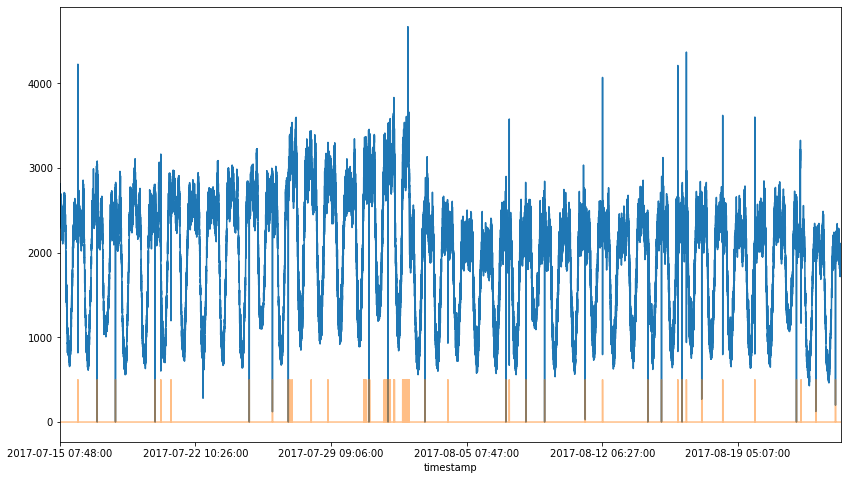

In [91]:
sup['value'].plot(kind='line',figsize=(14,8))
plt.plot(sup['pred']*500,alpha=.5)

In [105]:
# pickle.dump(model, open('./../../PICKLE/fb_7c189dd36f048a6c.pkl',"wb"))
# model2 = pickle.loads(save_model)
# model2.plot(forecast);

## Generic

In [2]:
input_dir_train = './../../train/KPI/train_'
input_dir_test = './../../test/KPI/test_'

KPI_arr = pd.read_csv('./../../KPI/KPI.csv').values

for KPI in KPI_arr:
    print(KPI[0])
    df_test = pd.read_csv(input_dir_test + KPI[0] + '.csv')
    
    # Format datasets
    df_test = df_test.drop(['KPI ID'],axis=1)

    df_test['ds'] = df_test['timestamp']
#     df_test['y'] = df_test['value']
    values = df_test['value'].values
    df_test = df_test.drop(['timestamp','value'], axis=1)
    
    
    # Load Pickle Model
    model = pickle.load( open('./../../PICKLE/fb_test_'+KPI[0] + '.pkl','rb'))
    forecast = model.predict(df_test)
    
    forecast = forecast.set_index(['ds'])
    df_test['value'] = values
    df_test['yhat'] = forecast['yhat'].values
    df_test = df_test.set_index(['ds'])
    
    df_test.to_csv('./../../DATASETS/fbprophet/fb_test_'+KPI[0]+'.csv')
    
    
    
    # Train with Train Data
#     model = Prophet()
#     model.fit(df_train)
#     pickle.dump(model, open('./../../PICKLE/fb_train_'+ KPI[0] + '.pkl',"wb"))
    
#     # Train with Test Data
#     model = Prophet()
#     model.fit(df_test)
#     pickle.dump(model, open('./../../PICKLE/fb_test_'+ KPI[0] + '.pkl',"wb"))


#     forecast = model.predict(df_test)

a40b1df87e3f1c87
b3b2e6d1a791d63a
da403e4e3f87c9e0
046ec29ddf80d62e
18fbb1d5a5dc099d
09513ae3e75778a3
07927a9a18fa19ae
cff6d3c01e6a6bfa
54e8a140f6237526
c58bfcbacb2822d1
7c189dd36f048a6c
8bef9af9a922e0b3
40e25005ff8992bd
76f4550c43334374
affb01ca2b4f0b45
88cf3a776ba00e7c
9bd90500bfd11edb
e0770391decc44ce
8a20c229e9860d0c
769894baefea4e9e
1c35dbf57f55f5e4
9ee5879409dccef9
71595dd7171f4540
8c892e5525f3e491
a5bf5d65261d859a
02e99bd4f6cfb33f


## Single Model Verify

In [209]:
input_dir_test = './../../test/KPI/test_'
df_test = pd.read_csv(input_dir_test + '8a20c229e9860d0c.csv')
    
# Format datasets
df_test = df_test.drop(['KPI ID'],axis=1)

df_test['ds'] = df_test['timestamp']
values = df_test['value'].values
df_test = df_test.drop(['timestamp','value'], axis=1)


# Load Pickle Model
model = pickle.load( open('./../../PICKLE/fb_test_8a20c229e9860d0c.pkl','rb'))
forecast = model.predict(df_test)
# print(forecast)

forecast = forecast.set_index(['ds'])
df_test['value'] = values
df_test['yhat'] = forecast['yhat'].values
df_test = df_test.set_index(['ds'])

print(df_test)

df_test.to_csv('./../../DATASETS/fbprophet/fb_test_8a20c229e9860d0c.csv')

                        value      yhat
ds                                     
2016-11-23 04:00:00  0.155695  0.152573
2016-11-23 04:05:00  0.154120  0.152584
2016-11-23 04:10:00  0.158750  0.152548
2016-11-23 04:15:00  0.166230  0.152466
2016-11-23 04:20:00  0.161367  0.152339
...                       ...       ...
2016-12-23 15:35:00  0.073824  0.077673
2016-12-23 15:40:00  0.070467  0.076073
2016-12-23 15:45:00  0.069077  0.074427
2016-12-23 15:50:00  0.065420  0.072735
2016-12-23 15:55:00  0.065926  0.071001

[8784 rows x 2 columns]


In [10]:
forecast.yhat.values

array([0.15789004, 0.15799972, 0.15805268, ..., 0.06469611, 0.06172557,
       0.05870402])

In [168]:
df_sup.dtypes

value    float64
yhat     float64
dtype: object